# Converting a tensorflow model

Follow the [notebook example] (https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/create_sine_model.ipynb)  

Make sure to install Tensorflow 2.0 wtih GPU support  
[install Tensorflow GPU](https://www.tensorflow.org/install/gpu)  
[download cuDNN 7.6.5](https://developer.nvidia.com/rdp/cudnn-download)  

[tf example to use](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/lite/micro/examples/person_detection)
[tf lite object detection](https://gilberttanner.com/blog/convert-your-tensorflow-object-detection-model-to-tensorflow-lite)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


if unable to download because of proxy,
* Download the dataset manually from https://s3.amazonaws.com/img-datasets/mnist.npz
* move mnist.npz to .keras/datasets/ 

In [3]:

mnist_data = r"mnist.npz"
(x_train, y_train), (x_test, y_test) = mnist.load_data(mnist_data)

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
type(x_train)

numpy.ndarray

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(16, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D(padding='same'))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D(padding='same'))
model.add(layers.Conv2D(128, 1, activation='relu'))
model.add(layers.MaxPool2D(padding='same'))
model.add(layers.Conv2D(256, 1, activation='relu'))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         8

In [8]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')


In [9]:
history_1 = model.fit(x_train, y_train, epochs=20, batch_size=128)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4197 - accuracy: 0.8621
Epoch 2/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1007 - accuracy: 0.9696
Epoch 3/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0703 - accuracy: 0.9793
Epoch 4/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0526 - accuracy: 0.9839
Epoch 5/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0459 - accuracy: 0.9860
Epoch 6/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0382 - accuracy: 0.9887
Epoch 7/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0322 - accuracy: 0.9905
Epoch 8/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0309 - accuracy: 0.9899
Epoch 9/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0270 - accuracy: 0.9919
Epoch 10/20
60

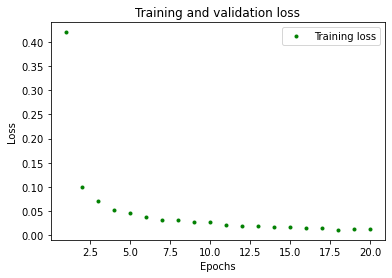

In [10]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_1.history['loss']
# val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 110us/sample - loss: 0.0418 - accuracy: 0.9897
[0.04184619208927825, 0.9897]


pred score: 4
pred: [[8.9515851e-13 4.0454029e-11 1.5823649e-13 4.6353772e-16 1.0000000e+00
  1.1375679e-12 1.2480698e-10 8.8556237e-12 6.2036491e-12 1.8435026e-08]]


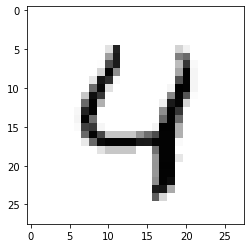

In [12]:
image_index = 4
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(f'pred score: {pred.argmax()}')
print(f'pred: {pred}')

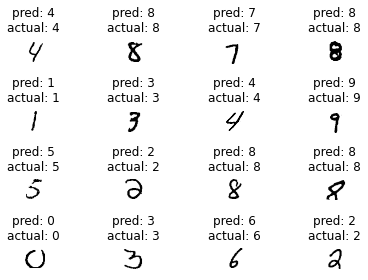

In [13]:
def test_model(model):
    # get 16 images
    plt.figure()
    rows, cols = 4, 4
    im_index =(np.random.uniform(0, x_test.shape[0], rows * cols)).astype(int)
    y_test_non_categorical = np.argmax(y_test, axis=1, out=None)
    
    for i, imi in enumerate(im_index):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x_test[imi].reshape(28, 28), cmap='Greys')
        pred = model.predict(x_test[imi].reshape(1,28,28,1))
        plt.title(f"pred: {pred.argmax()}\nactual: {y_test_non_categorical[imi]}")
        plt.axis('off')
    plt.tight_layout()
    
test_model(model)
    

#### We're going to skip saving to .h5 file for now

### Convert to Tensorflow Lite

In [14]:
# convert without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_model = converter.convert()

open("mnist_model.tflite", "wb").write(tf_lite_model)


# convert with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tf_lite_model = converter.convert()

# save teh model to disk
open("mnist_model_quantized.tflite", "wb").write(tf_lite_model)

140000

== Input details ==
shape: 1

== Output details ==
shape: 0
img shape: (28, 28, 1)
output of regular model


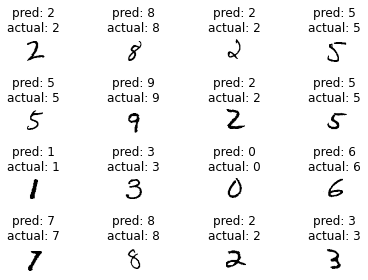

In [52]:
from PIL import Image


# test the covnerted model
mnist_model = tf.lite.Interpreter('mnist_model.tflite')
mnist_model_quantized = tf.lite.Interpreter('mnist_model_quantized.tflite')


# allocate memory
mnist_model.allocate_tensors()
mnist_model_quantized.allocate_tensors()



# Get the input and output tensors so we can feed in values and get the results
mnist_model_input = mnist_model.tensor(mnist_model.get_input_details()[0]["index"])
mnist_model_output = mnist_model.tensor(mnist_model.get_output_details()[0]["index"])
mnist_model_quantized_input = mnist_model_quantized.tensor(mnist_model_quantized.get_input_details()[0]["index"])
mnist_model_quantized_output = mnist_model_quantized.tensor(mnist_model_quantized.get_output_details()[0]["index"])

print("== Input details ==")
print("shape:", mnist_model.get_input_details()[0]["index"])
print("\n== Output details ==")
print("shape:",mnist_model.get_output_details()[0]["index"])
print("img shape:", x_test[0].shape)

# Create arrays to store the results
mnist_model_predictions = np.empty(x_test.size)
mnist_model_quantized_predictions = np.empty(x_test.size)

def test_saved_model(model, model_input, model_output):

    # get 16 images
    plt.figure()
    plt.title(f'output of {model}')
    rows, cols = 4, 4
    im_index =(np.random.uniform(0, x_test.shape[0], rows * cols)).astype(int)
    y_test_non_categorical = np.argmax(y_test, axis=1, out=None)
    
    for i, imi in enumerate(im_index):
        model_input()[0] = x_test[imi]
        model.invoke()
        pred = np.argmax(model_output()[0])
   
        
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x_test[imi].reshape(28, 28), cmap='Greys')
        plt.title(f"pred: {pred}\nactual: {y_test_non_categorical[imi]}")
        plt.axis('off')
    plt.tight_layout()

print("output of regular model")
test_saved_model(mnist_model, mnist_model_input, mnist_model_output)


output of quantized mdoel


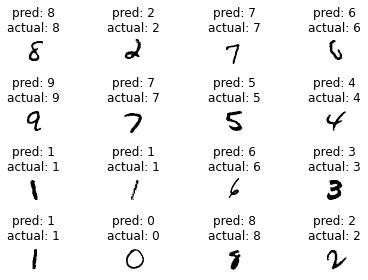

In [51]:
print("output of quantized mdoel")
test_saved_model(mnist_model_quantized, mnist_model_quantized_input, mnist_model_quantized_output)

In [53]:
import os
basic_model_size = os.path.getsize("mnist_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("mnist_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 536192 bytes
Quantized model is 140000 bytes
Difference is 396192 bytes


In [ ]:
# convert the tflite model to a c++ source file, I used xxd from my vim installation on windows but linux has xxd built in

In [58]:
# Install xxd if it is not available
# !apt-get -qq install xxd
# Save the file as a C source file
!"C:\Program Files (x86)\Vim\vim81\xxd" -i mnist_model_quantized.tflite > mnist_model_quantized.cpp
# Print the source file
!type mnist_model_quantized.cpp

unsigned char mnist_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00,
  0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x4c, 0x22, 0x02, 0x00, 0x04, 0x14, 0x02, 0x00, 0xec, 0x13, 0x02, 0x00,
  0x34, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x64, 0xde, 0xfd, 0xff, 0x08, 0x00, 0x00, 0x00,
  0x1e, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f,
  0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73,
  0x69, 0x6f, 0x6e, 0x00, 0x1f, 0x00, 0x00, 0x00, 0xac, 0x13, 0x02, 0x00,
  0xa4, 0x13, 0x02, 0x00, 0x94, 0xcb, 0x01, 0x00, 0x8c, 0xcb, 0x01, 0x00,
  0x7c, 0x4b, 0x01, 0x00, 0x74, 0x4b, 0x01, 0x00, 0x5c, 0x4b, 0x01, 0x00,
  0x4c, 0x41, 0x01, 0x00, 0x3c, 0x3d, 0x01, 0x00, 0x34, 0x3d, 0x01, 0x00,
  0x2c, 0x3d, 0x01, 0x00, 0xdc, 0x3c, 0x01, 0x00, 0x4c, 0x3c, 0

  0x01, 0xff, 0xf5, 0x14, 0xfa, 0x11, 0x01, 0x01, 0xe6, 0xfc, 0xe1, 0xf0,
  0xf6, 0xe7, 0xe3, 0xe7, 0xe9, 0xf8, 0xe8, 0xf4, 0x13, 0xec, 0x04, 0x00,
  0x07, 0x0b, 0xde, 0xe2, 0xfb, 0x0c, 0xe5, 0xfc, 0x07, 0x10, 0xf0, 0xec,
  0xe5, 0xf7, 0xea, 0xe9, 0x07, 0x16, 0xf1, 0x17, 0xf8, 0xe6, 0xe8, 0x03,
  0xf0, 0xed, 0xe1, 0xf8, 0x14, 0xfa, 0xef, 0xec, 0x0c, 0x12, 0xf9, 0x01,
  0xe5, 0x0c, 0xeb, 0xf5, 0x0f, 0xf1, 0x16, 0xf1, 0xf1, 0xf1, 0xeb, 0xdc,
  0xf9, 0x13, 0xee, 0xe9, 0xfa, 0xe3, 0xdc, 0x0c, 0x00, 0xed, 0xff, 0xc6,
  0xf0, 0xff, 0x14, 0xfa, 0xdd, 0x2a, 0x03, 0x09, 0x0f, 0xfb, 0x01, 0xfa,
  0x01, 0xcc, 0xe7, 0x02, 0x01, 0xf2, 0xe8, 0x03, 0x13, 0xdc, 0xc5, 0xd8,
  0x0e, 0xf2, 0x11, 0xf8, 0x18, 0xee, 0xfe, 0xfc, 0x25, 0xfe, 0x29, 0xc8,
  0x19, 0xf7, 0x2b, 0x0d, 0xfd, 0x0c, 0xef, 0x00, 0x16, 0x1d, 0x0d, 0x37,
  0x15, 0x29, 0xfc, 0x0f, 0x0d, 0xfc, 0xfe, 0xf0, 0xe7, 0x00, 0xf8, 0x19,
  0xdf, 0xf8, 0xdb, 0xf2, 0x05, 0xf5, 0x01, 0x24, 0xf3, 0x03, 0x08, 0x1a,
  0xe1, 0xf0, 0x02, 0xe5, 0xf9, 0x0a, 

  0xe8, 0xfd, 0x11, 0x0b, 0x20, 0xf5, 0xee, 0x15, 0x08, 0xec, 0xfc, 0xea,
  0xf5, 0x23, 0xe5, 0x14, 0x0e, 0x05, 0xdf, 0x07, 0xfe, 0x1b, 0xfe, 0x2b,
  0x05, 0xfd, 0x0e, 0x00, 0x06, 0x1e, 0xe7, 0xe2, 0xde, 0xf0, 0x12, 0xf3,
  0xee, 0x13, 0xe7, 0x03, 0xd0, 0x0b, 0xe9, 0x08, 0x07, 0x00, 0x04, 0x2f,
  0x02, 0xe5, 0xd6, 0x12, 0x0f, 0x22, 0x0e, 0x03, 0xf3, 0x04, 0xdd, 0xce,
  0xeb, 0x07, 0xe0, 0x07, 0x0c, 0xf7, 0x1f, 0xfc, 0xf9, 0xcb, 0x03, 0x0f,
  0xe7, 0xca, 0x1d, 0xea, 0xd8, 0x17, 0x1c, 0xea, 0x00, 0xf5, 0xe4, 0x06,
  0xc5, 0x0d, 0x16, 0x02, 0xf9, 0x05, 0x0e, 0xfa, 0xf6, 0x0e, 0x15, 0x11,
  0x00, 0xde, 0xe5, 0x1a, 0xe1, 0x07, 0xed, 0x17, 0x00, 0xf7, 0x1b, 0x36,
  0xef, 0x0d, 0xe9, 0x08, 0x21, 0xf1, 0x0f, 0x10, 0x16, 0xde, 0xf0, 0x0b,
  0x0c, 0xf5, 0x0a, 0xea, 0x0f, 0x0e, 0x0d, 0x27, 0x1c, 0x02, 0x14, 0xf5,
  0x04, 0xf1, 0xe3, 0x02, 0x0b, 0xe6, 0x15, 0xf2, 0xfa, 0xeb, 0x01, 0xf0,
  0xf5, 0xd7, 0x1f, 0xe1, 0xeb, 0xec, 0xda, 0xf5, 0xfa, 0xec, 0x04, 0xae,
  0x18, 0xe9, 0x17, 0xe2, 0x1f, 0x29, 

  0x12, 0xef, 0xfa, 0x31, 0x2c, 0x15, 0xee, 0xcc, 0x2a, 0xf2, 0xf2, 0x00,
  0xfe, 0xc6, 0x15, 0x16, 0xec, 0x0d, 0xfd, 0xf4, 0xf0, 0x03, 0xfd, 0x21,
  0xd6, 0x9d, 0xe7, 0xf8, 0xbc, 0x1a, 0x0b, 0xed, 0x22, 0xf1, 0xd5, 0x05,
  0x22, 0xf3, 0xe9, 0xf2, 0x26, 0xd5, 0xe4, 0xe6, 0x22, 0x2d, 0xd1, 0xe9,
  0xf8, 0xe9, 0xbc, 0xf9, 0x04, 0x22, 0xd7, 0x0f, 0xf0, 0x18, 0xe0, 0xcb,
  0x2a, 0x30, 0x10, 0xf1, 0xc9, 0x1b, 0x0d, 0x1a, 0xe1, 0xdd, 0xeb, 0xe8,
  0x00, 0xf2, 0xdb, 0xea, 0xff, 0x08, 0x14, 0x1d, 0x17, 0xef, 0x06, 0xeb,
  0x13, 0xc1, 0xab, 0x3e, 0xd5, 0x03, 0x23, 0xfc, 0x17, 0xfd, 0xd1, 0xc9,
  0xe5, 0x08, 0xeb, 0xc7, 0xef, 0x2d, 0xd2, 0xca, 0xf2, 0xab, 0x11, 0x14,
  0x12, 0x11, 0xdd, 0xd7, 0x08, 0x04, 0x0a, 0xce, 0xed, 0xf6, 0x05, 0xdf,
  0xf7, 0x17, 0xe1, 0xd9, 0x1e, 0xdd, 0xdb, 0x28, 0x00, 0xe0, 0xf4, 0xe1,
  0x2d, 0xdd, 0xe7, 0x02, 0xc5, 0x0f, 0x0d, 0x10, 0xd7, 0xd2, 0xd0, 0x12,
  0xfc, 0xf2, 0x29, 0xee, 0xbf, 0xe1, 0xf4, 0x21, 0x1e, 0xd8, 0xf3, 0xea,
  0x05, 0x00, 0x15, 0xd9, 0xed, 0xe9, 

  0x11, 0x17, 0xe2, 0x05, 0x04, 0xf2, 0xef, 0xe6, 0xf1, 0xf6, 0x1c, 0xe4,
  0x00, 0xef, 0x0e, 0x01, 0xf8, 0xe7, 0xe5, 0xf1, 0xf7, 0xe6, 0xe9, 0xd3,
  0xfa, 0x0e, 0x01, 0xe6, 0xf1, 0xdf, 0xe0, 0x19, 0x10, 0x03, 0x07, 0xf7,
  0x18, 0xfe, 0xfe, 0x19, 0x18, 0xf5, 0xf3, 0xe8, 0xf6, 0x14, 0x0c, 0x1b,
  0xeb, 0x18, 0xe4, 0xfe, 0xf9, 0xe7, 0xe6, 0xd7, 0xf4, 0x02, 0xef, 0xe2,
  0xf7, 0x08, 0xe9, 0xfe, 0xdb, 0x03, 0xeb, 0xdf, 0xde, 0x22, 0xf2, 0x06,
  0xe8, 0xdb, 0x10, 0xfb, 0xfc, 0x15, 0x21, 0x13, 0xda, 0x01, 0xe2, 0xf2,
  0xd5, 0x01, 0xfa, 0xef, 0x0a, 0xcb, 0xf8, 0xee, 0x03, 0xee, 0xcd, 0x0e,
  0xe0, 0x0f, 0xf6, 0xfb, 0xfd, 0x2a, 0xeb, 0x13, 0x1e, 0xfa, 0x16, 0xf8,
  0x1a, 0xf5, 0x29, 0xf6, 0x04, 0xb9, 0x29, 0xe5, 0xed, 0xd8, 0x23, 0xce,
  0xf2, 0xd1, 0xf4, 0xf7, 0x28, 0xfe, 0x18, 0xdf, 0x20, 0x0c, 0x21, 0x37,
  0x04, 0xd8, 0x15, 0xc6, 0xec, 0x2a, 0xdd, 0xd6, 0xdc, 0x08, 0x0a, 0x06,
  0x17, 0xe8, 0xe6, 0x06, 0x0a, 0x03, 0xf3, 0x19, 0x06, 0xe8, 0x14, 0x0c,
  0xdc, 0x12, 0x0e, 0x0a, 0x00, 0xfe, 